In [4]:
import numpy as np 
import pandas as pd

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [7]:
df = pd.read_csv('data/Churn_Modelling.csv')

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [16]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(X_train_trf,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5517 - accuracy: 0.7958 - val_loss: 0.5048 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 388us/step - loss: 0.4987 - accuracy: 0.7958 - val_loss: 0.4922 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 387us/step - loss: 0.4889 - accuracy: 0.7958 - val_loss: 0.4834 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 381us/step - loss: 0.4789 - accuracy: 0.7958 - val_loss: 0.4731 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 384us/step - loss: 0.4674 - accuracy: 0.7958 - val_loss: 0.4617 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 382us/step - loss: 0.4549 - accuracy: 0.7958 - val_loss: 0.4506 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 385us/step - loss: 0.4433 - accuracy: 0.7958 - val_loss: 0.4427 - val_accu

In [24]:
y_pred = model.predict(X_test_trf)

63/63 [==============================] - 0s 227us/step


In [25]:
y_pred

array([[0.28045043],
       [0.2950539 ],
       [0.15970968],
       ...,
       [0.0907727 ],
       [0.12876624],
       [0.23217827]], dtype=float32)

In [26]:
y_pred = y_pred.argmax(axis=-1)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

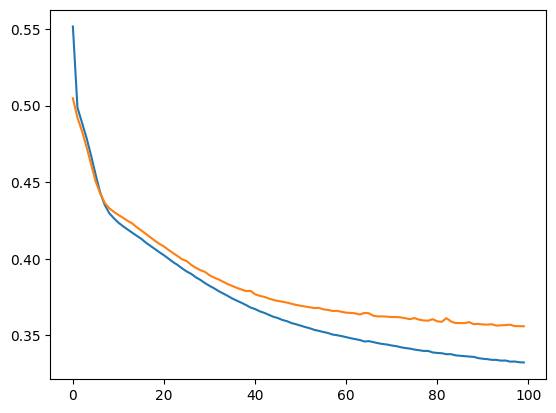

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

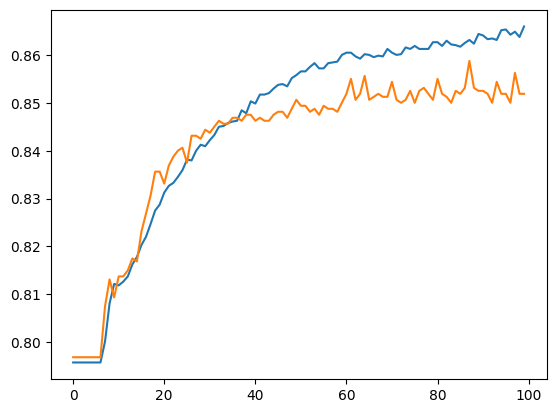

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## Early stopping